In [51]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose


In [52]:
covid = pd.read_csv('resulta_covid19_data_alagoas.csv')

In [53]:
covid['Updated'] = covid['Updated'].astype(np.datetime64)

In [54]:
lab = []
pos = []
for i in covid.Updated:
    i_d = i
    x = f'{i_d.month:02d}/{i_d.year}'
    if x not in lab:
        lab.append(x)
        pos.append(i)

In [55]:
def plot_graf_time(col):
    plt.figure(figsize=(40, 20))
    plt.plot(covid.Updated, covid[col])
    plt.xticks(pos, lab) 

    plt.show()

In [204]:
cols = list(covid)

for i in ['Updated', 'ConfirmedChange', 'DeathsChange']:
    cols.remove(i)

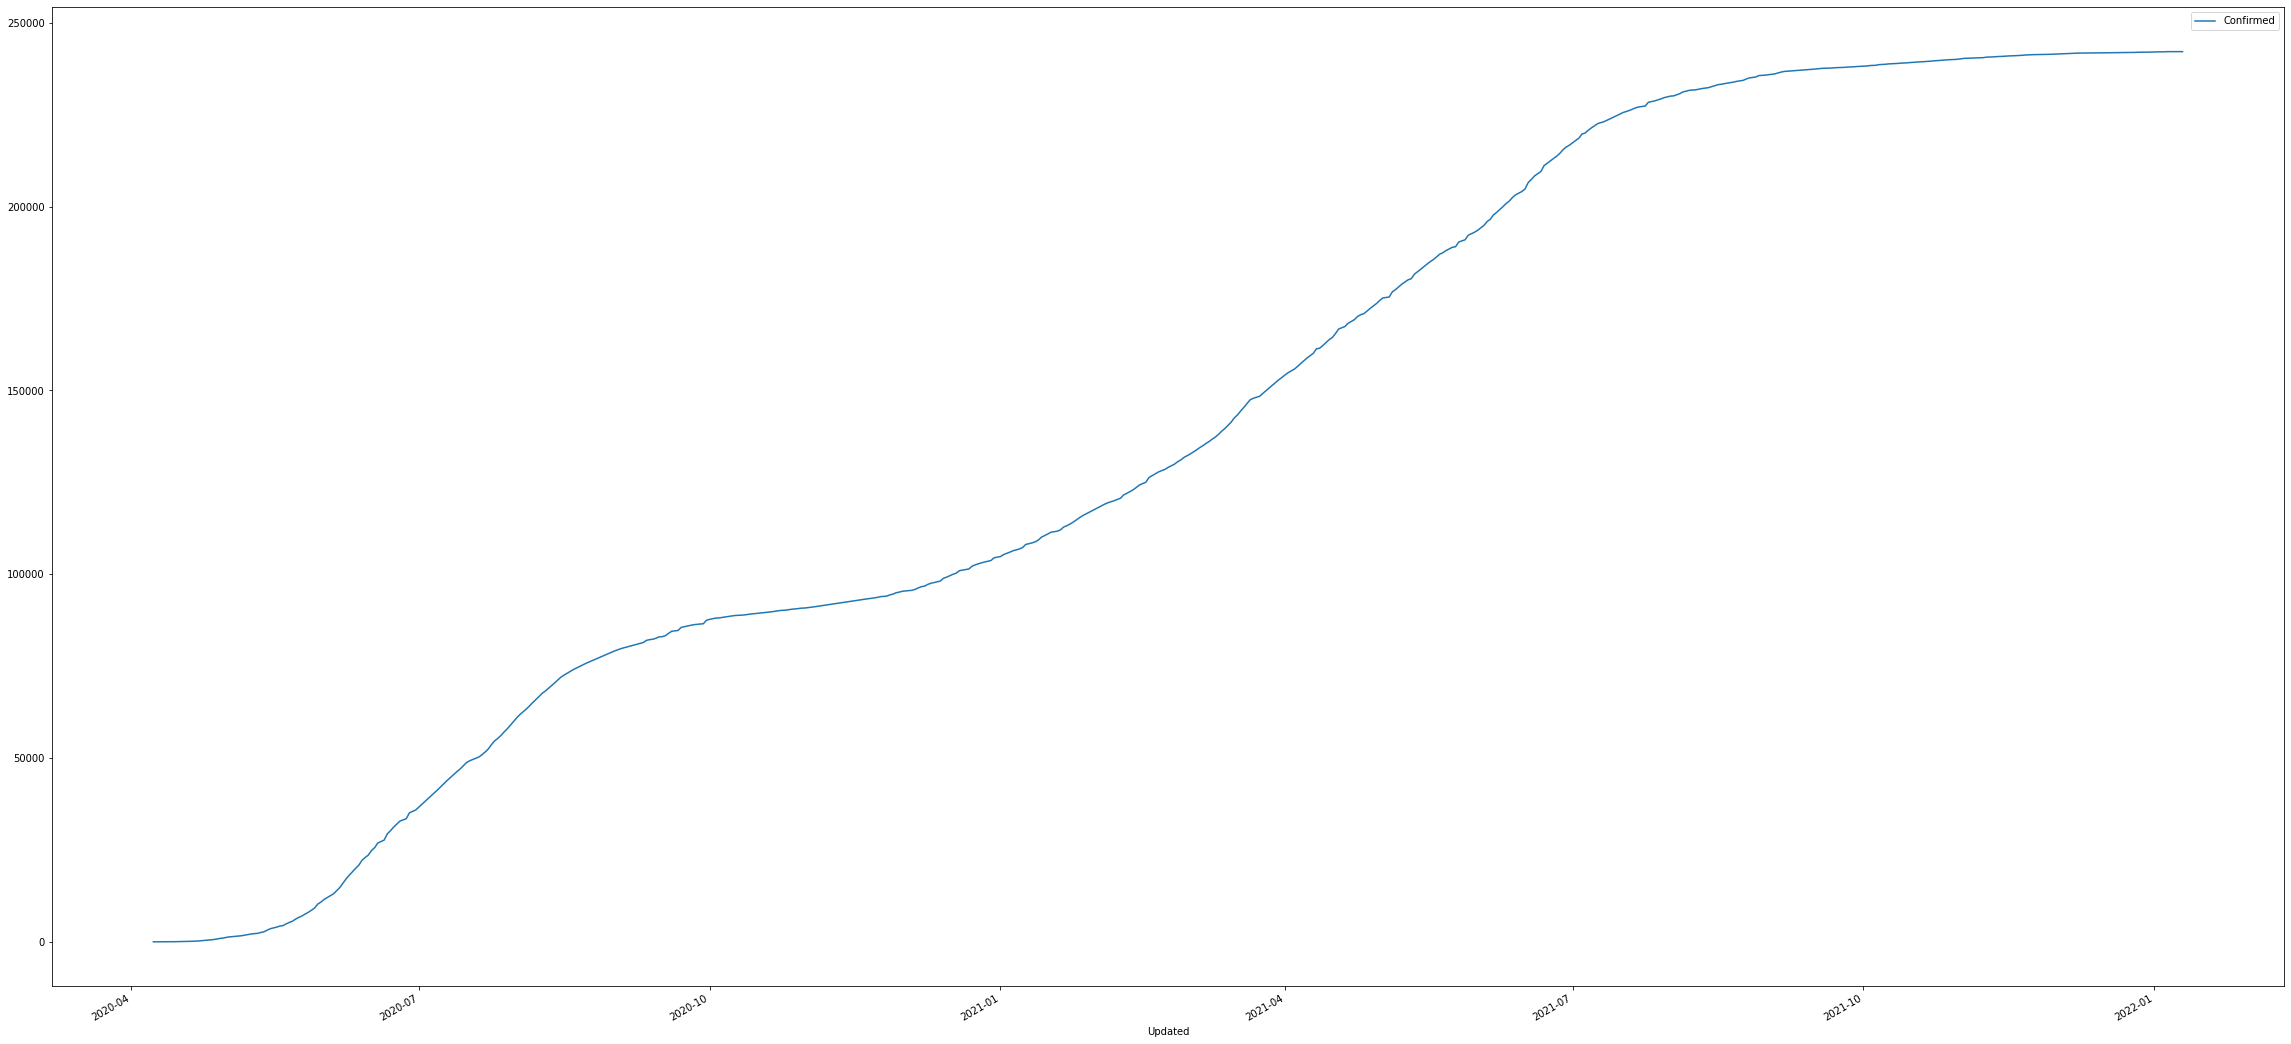

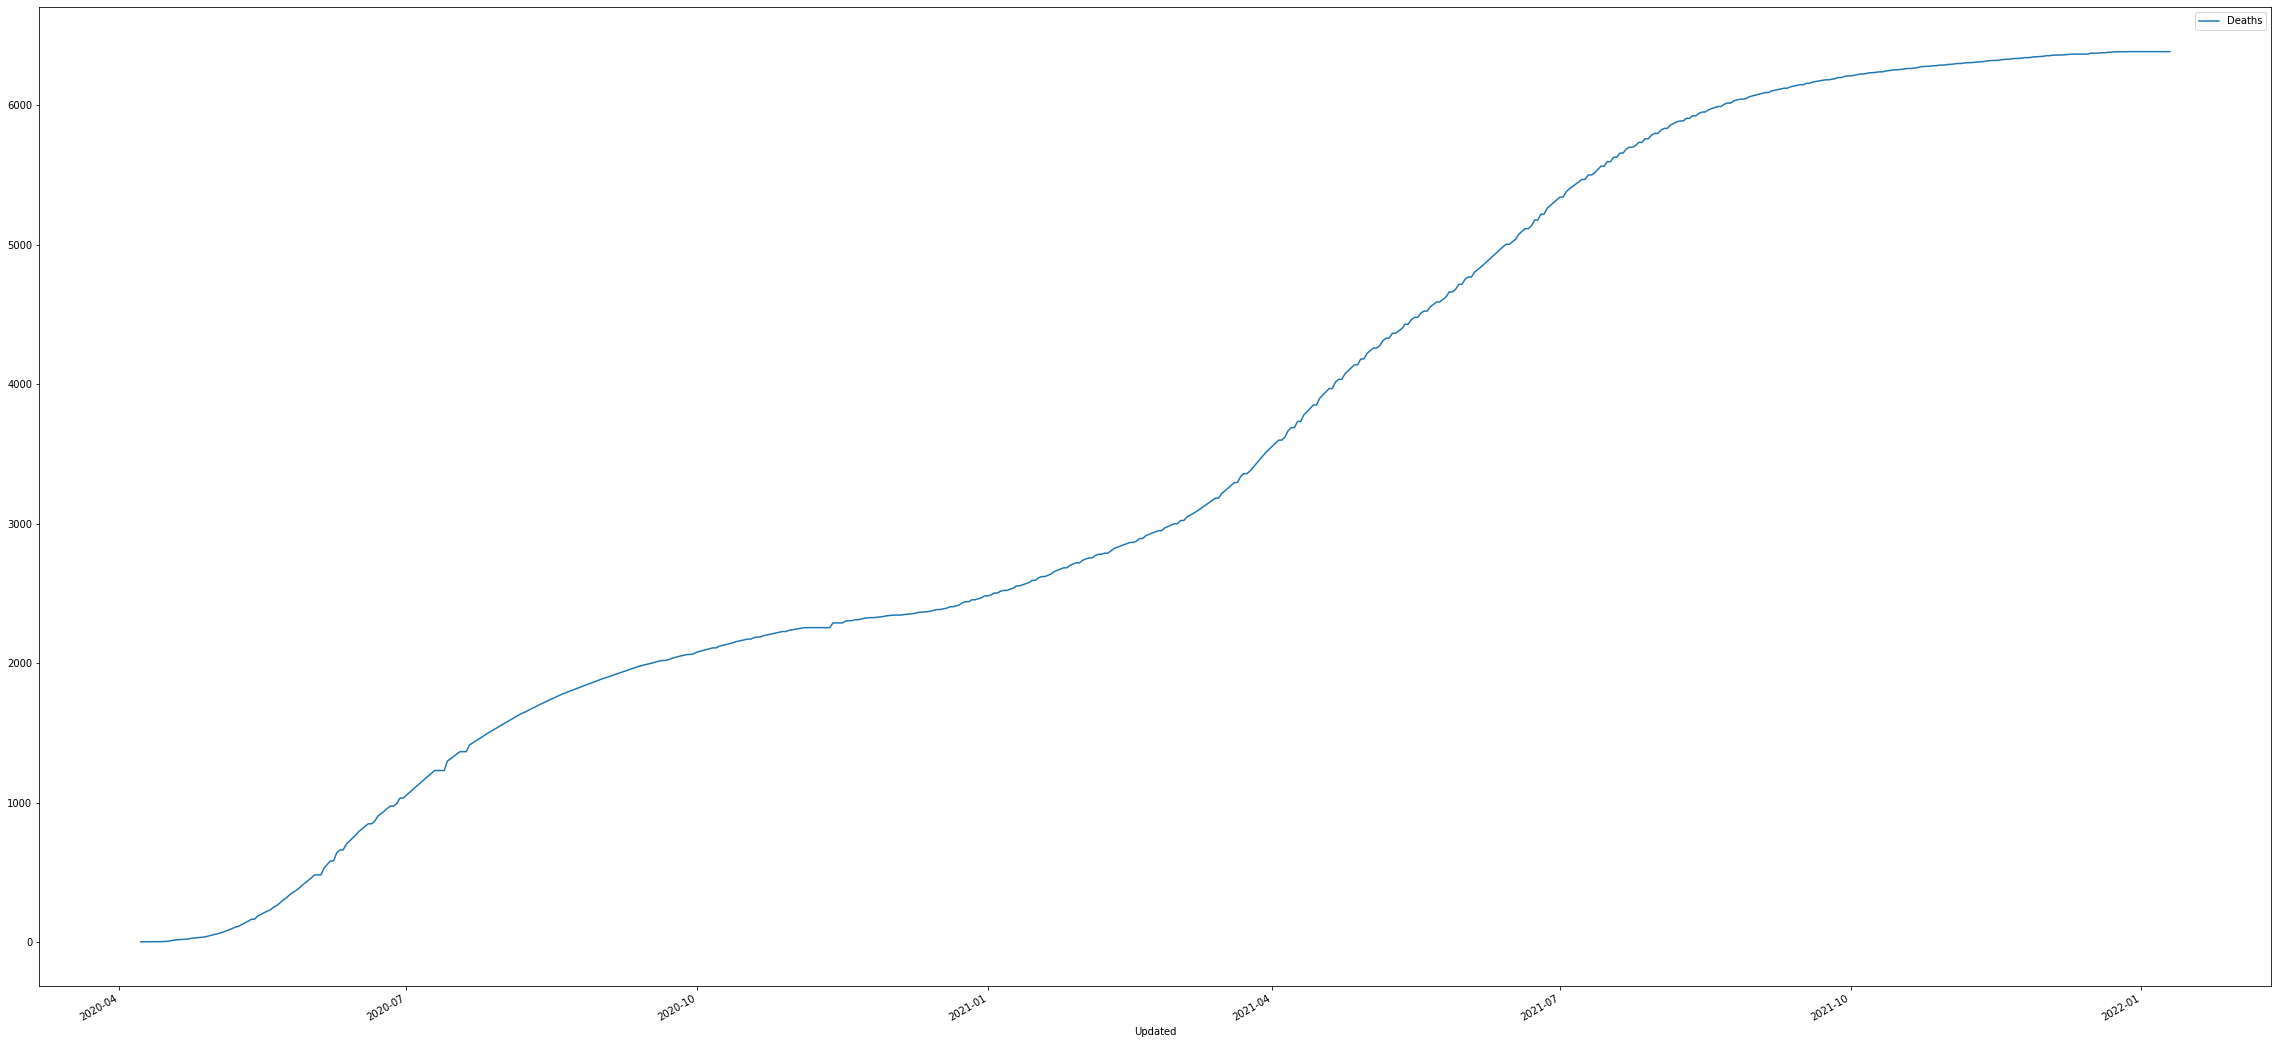

In [205]:
for i in cols:
    covid.plot(x='Updated', y=i, figsize=(40,20))

In [202]:
def decompose(col, fator):
    new_covid = pd.DataFrame({'data': covid[col].to_numpy()}, index=covid['Updated'].to_numpy())
    size = len(covid['Updated']) // fator

    result_add = seasonal_decompose(new_covid, period=size, extrapolate_trend='freq')
    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_add.plot().suptitle('', fontsize=15)
    plt.show()


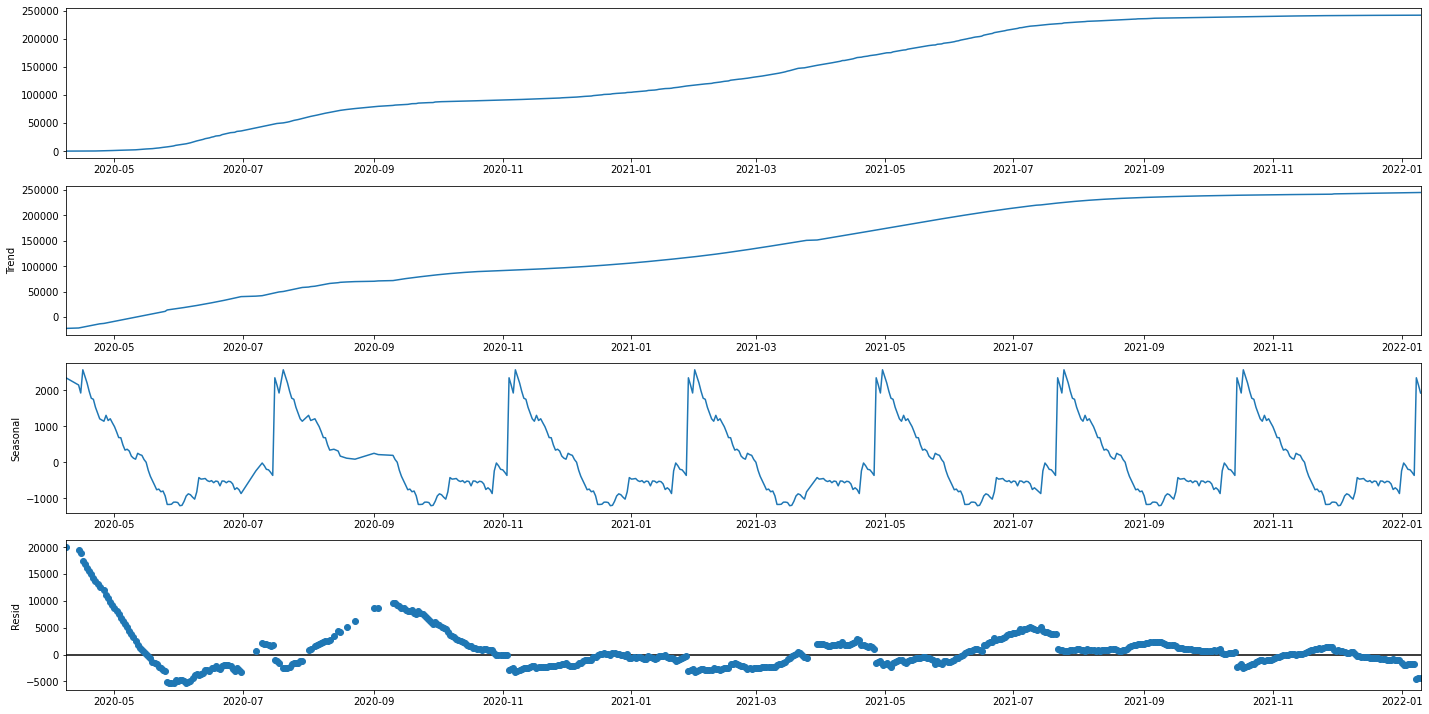

In [203]:
decompose('Confirmed', 7)

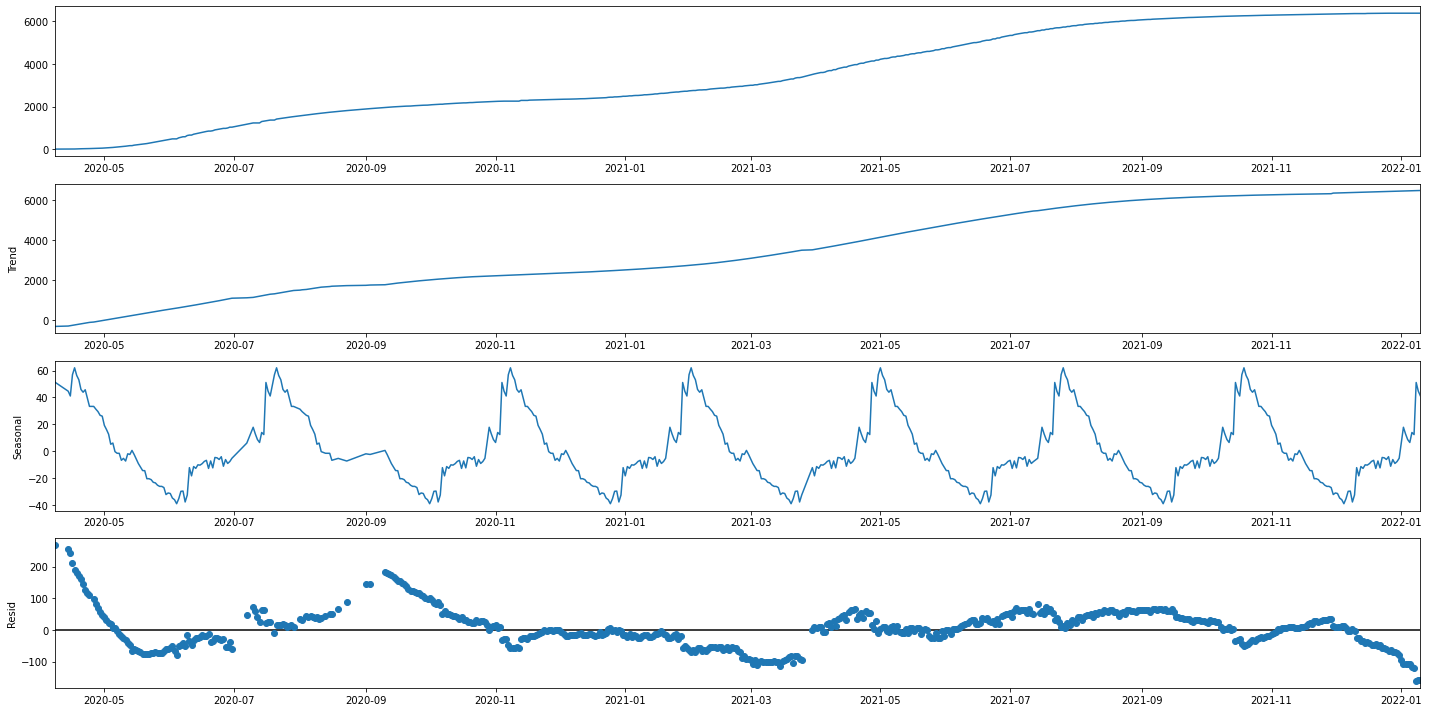

In [199]:
decompose('Deaths', 7)